### Computer Vision: Image Enhancement
Allen Lau

In [11]:
# importing libraries
import numpy as np 
import matplotlib.pyplot as plt  

#### Qustion 1

(20 points) Generate the histogram of the image you are using, and then perform a number of histogram operations (at least including contrast enhancement, thresholding, and equalization) to make the image visually better for either viewing or processing (10 points).  If it is a color image,  please first turn it into an intensity image and then generate its histogram.  Try to display your histograms of the original and the processed images (5 points), and make some observations of the images based on their histograms (5 points). What are the general distributions of the intensity values of each histogram? How many major peaks and valleys does your histogram have, and how do they behave? How could you use the histograms to understand, analyze or segment the image?

In [ ]:
#reading in image as numpy array 
img_color = plt.imread('images/IDPicture.bmp')[:,:,:3] #only considering R,G,B channels, and ignoring alpha channel 
#converting image into intensity image via simple average approach 
img = np.round(np.sum(img_color,axis=2)/3).astype('uint8')
#displaying image 
plt.imshow(img,cmap='gray');
plt.title('Figure 1: ID Picture Intensity Image');

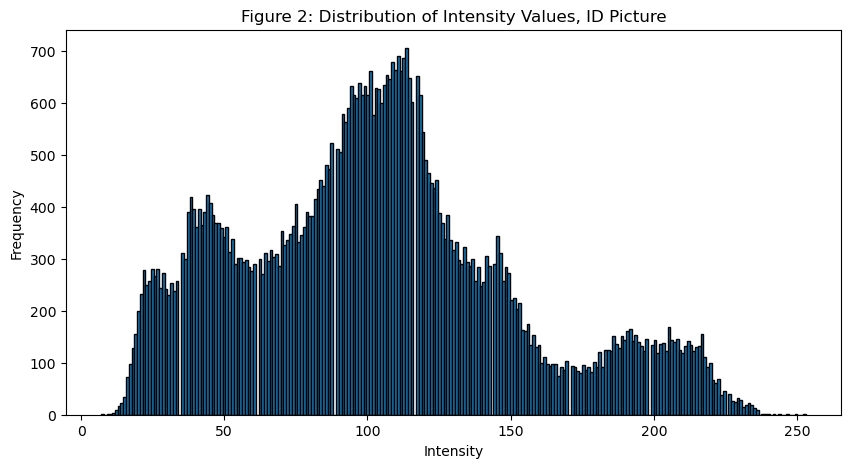

In [13]:
#histogram of intensity image 
plt.figure(figsize=(10,5))
#compute histogram 
plt.hist(img.flatten(),bins=255,edgecolor='black');
#display formatting 
plt.title('Figure 2: Distribution of Intensity Values, ID Picture');
plt.xlabel('Intensity');
plt.ylabel('Frequency');

##### Contrast Enhancement

In [ ]:
#contrast enhancement using linear scaling 
# I' = [K/(Imax-Imin)]*I + [K/(Imax-Imin)]*Imin

#defining constants 
Imin = np.min(img)
Imax = np.max(img)
m = 255/(Imax-Imin)
b = (255/(Imax-Imin))*Imin

#create empty image of the same shape as the original 
contrast_enh = np.zeros(img.shape)

#calculate contrast enhanced image 
contrast_enh = m*img + b 
contrast_enh = contrast_enh.astype('uint8')

#display image
plt.imshow(contrast_enh,cmap='gray')
plt.title('Figure 3: Contrast Enhancement, ID Picture');

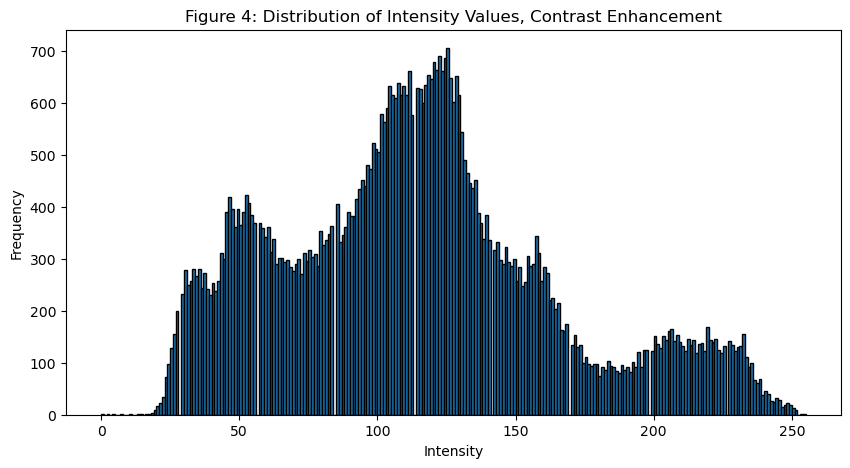

In [15]:
#histogram of threshold image 
plt.figure(figsize=(10,5))
#compute histogram 
plt.hist(contrast_enh.flatten(),bins=255,edgecolor='black');
#display formatting 
plt.title('Figure 4: Distribution of Intensity Values, Contrast Enhancement');
plt.xlabel('Intensity');
plt.ylabel('Frequency');

##### Thresholding

In [16]:
#function for thresholding 
def thresholding(image,threshold):
    #define empty image for thresholding 
    res = np.zeros(image.shape)
    #threshold the image by setting pixels to either 0 or 255 
    res[image>threshold] = 255
    res[image<=threshold] = 0 
    #typing 
    res = res.astype('uint8')
    return res


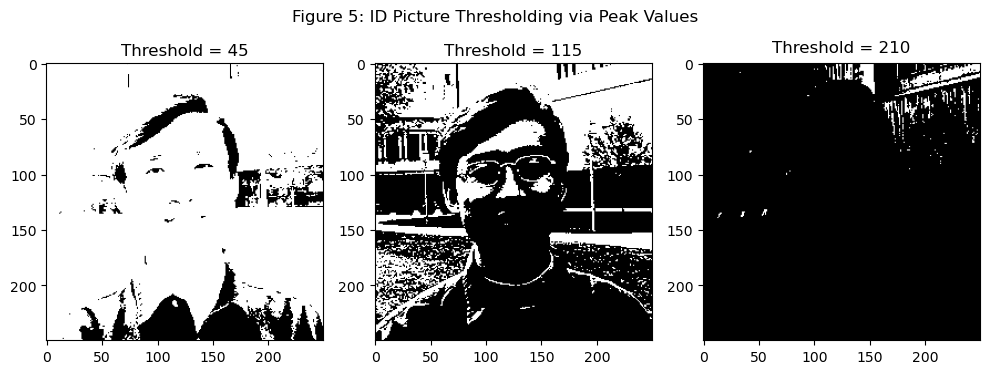

In [17]:
#thresholding 
threshold_img_45 = thresholding(img,45)
threshold_img_115 = thresholding(img,115)
threshold_img_210 = thresholding(img,210)
#display
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,5))
ax1.imshow(threshold_img_45,cmap='gray')
ax1.set_title('Threshold = 45')
ax2.imshow(threshold_img_115,cmap='gray')
ax2.set_title('Threshold = 115')
ax3.imshow(threshold_img_210,cmap='gray')
ax3.set_title('Threshold = 210',ha='center',va='bottom')
plt.suptitle('Figure 5: ID Picture Thresholding via Peak Values')
plt.tight_layout(rect=[0, 0.25, 1, 1])
plt.show()

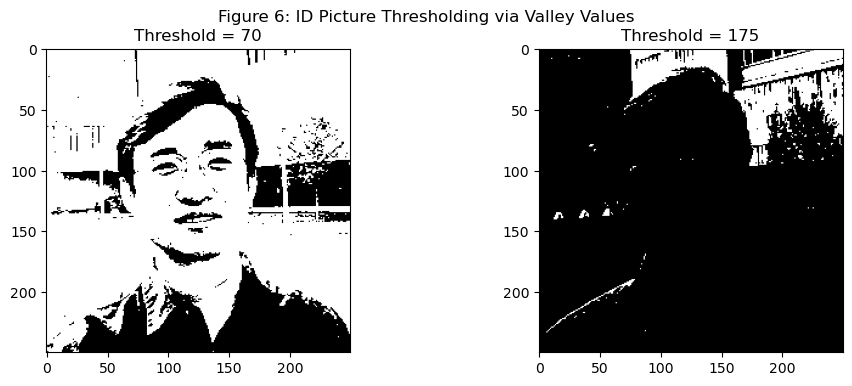

In [18]:
#thresholding 
threshold_img_70 = thresholding(img,70)
threshold_img_175 = thresholding(img,175) 
#display
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.imshow(threshold_img_70,cmap='gray')
ax1.set_title('Threshold = 70')
ax2.imshow(threshold_img_175,cmap='gray')
ax2.set_title('Threshold = 175')
plt.suptitle('Figure 6: ID Picture Thresholding via Valley Values')
plt.tight_layout(rect=[0, 0.25, 1, 1])
plt.show()

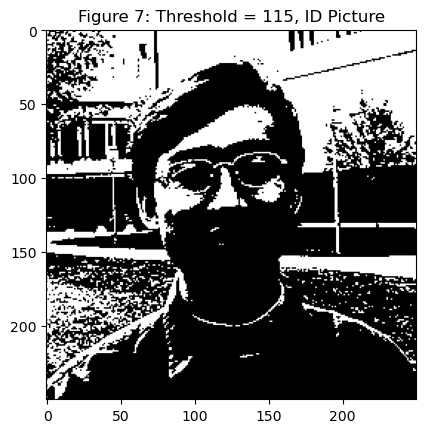

In [19]:
#create empty image of the same shape as the original 
threshold_img = np.zeros(img.shape)
#define threshold
thres = 115
#threshold based on defined value, setting pixels to either 0 or 255  
threshold_img[img>thres] = 255
threshold_img[img<=thres] = 0
threshold_img = threshold_img.astype('uint8')
#display 
plt.imshow(threshold_img,cmap='gray');
plt.title('Figure 7: Threshold = 115, ID Picture');

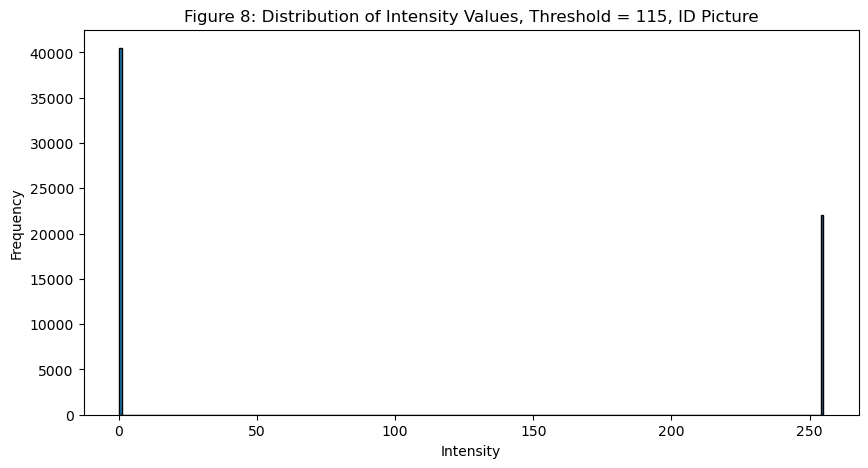

In [20]:
#histogram of threshold image 
plt.figure(figsize=(10,5))
#compute histogram 
plt.hist(threshold_img.flatten(),bins=255,edgecolor='black');
#display formatting 
plt.title('Figure 8: Distribution of Intensity Values, Threshold = 115, ID Picture');
plt.xlabel('Intensity');
plt.ylabel('Frequency');

##### Equalization

In [21]:
#histogram equalization 

#defining the num row and column
M,N = img.shape
#defining number of gray levels 
G = 30 
#calculating ideal number of pixels for each gray level
Np = (M*N)/G
#calculating the CDF for the original image 
##calculating histogram 
count, bins_count = np.histogram(img.flatten(),bins=256)
##calculate cumulative histogram  
ch = np.cumsum(count)

#compute the equalization image 
##define empty array 
equal_img = np.zeros(img.shape)

##looping through each pixel of the image to calculate the approximate intensity value
for i in range(0,M):
    for j in range(0,N):
        equal_img[i,j] = max(0,(round(ch[img[i,j]]/Np)-1)) 

#typing 
equal_img = equal_img.astype('uint8')

In [ ]:
plt.imshow(equal_img,cmap='gray')
plt.title('Figure 9: Equalization, ID Picture, G = 30');

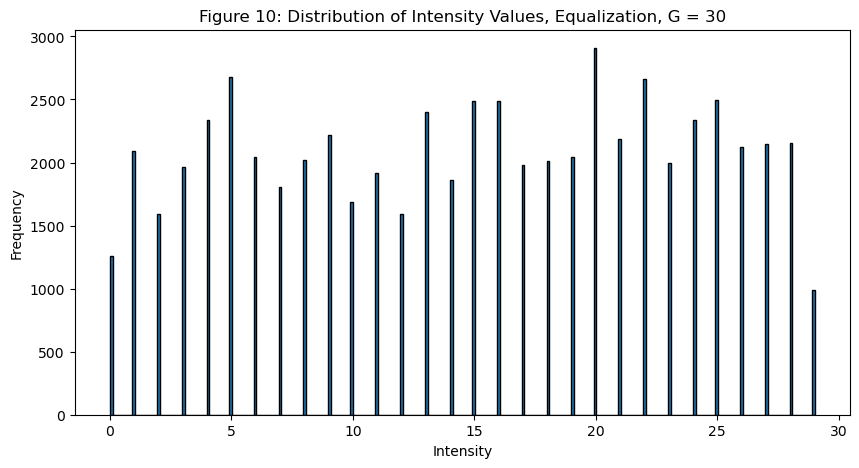

In [23]:
#histogram of threshold image 
plt.figure(figsize=(10,5))
#compute histogram 
plt.hist(equal_img.flatten(),bins=255,edgecolor='black');
#display formatting 
plt.title('Figure 10: Distribution of Intensity Values, Equalization, G = 30');
plt.xlabel('Intensity');
plt.ylabel('Frequency');

#### Qustion 2

(20 points) Apply BOTH the 1×2 operator and Sobel operator to your image and analyze and compare the results of the gradient magnitude images (including vertical gradients, horizontal gradients, and the combined) (10 points). Please don’t forget to normalize your gradient images, noting that the original vertical and horizontal gradients have both positive and negative values. I would recommend you to display the absolute values of the horizontal and vertical gradient images.  Does the Sobel operator have any clear visual and processing advantages over the 1×2 operator? Any disadvantages (5 points)? If you subtract the normalized 1×2 gradient image from the normalized Sobel gradient image, are there any residuals? You might use two different types of images: one ideal man-made image, and one image of a real scene with more details (5 points).

In [24]:
#padding the input image with zeros on the edges for kernel operations 
img_padded = np.zeros((img.shape[0]+2,img.shape[1]+2))
img_padded[1:1+img.shape[0],1:1+img.shape[1]] = img

##### 1x2 Operator

In [25]:
#1x2 kernel 
kernel_1_2 = [-1,1]

#create empty vertical gradient image 
v_12_img = np.zeros(img.shape)
#create empty horizontal gradient image 
h_12_img = np.zeros(img.shape)

#define bounds for looping 
r,c = img.shape

#horizontal gradiant image 
##for each pixel, perform convolutional operation for the gradiant image
for i in range(0,r):
    for j in range(0,c):
        #kernel[0]*i(i,j) + kernel[1]*i[i+1,j]
        #normalize by dividing by 2 
        h_12_img[i,j] = (kernel_1_2[0]*img_padded[i,j]+kernel_1_2[1]*img_padded[i+1,j])/2

#vertical gradiant image 
##for each pixel, perform convolutional operation for the gradiant image
for i in range(0,r):
    for j in range(0,c):
        #kernel[0]*i(i,j) + kernel[1]*i[i,j+1]
        #normalize by dividing by 2 
        v_12_img[i,j] = (kernel_1_2[0]*img_padded[i,j]+kernel_1_2[1]*img_padded[i,j+1])/2

#taking abs of the values 
v_12_img = np.abs(v_12_img).astype('uint8')
h_12_img = np.abs(h_12_img).astype('uint8')
#creating combined vertical and horizontal images
combined_12_img = (v_12_img + h_12_img)/2 #divide by 2 to normalize
combined_12_img = combined_12_img.astype('uint8')

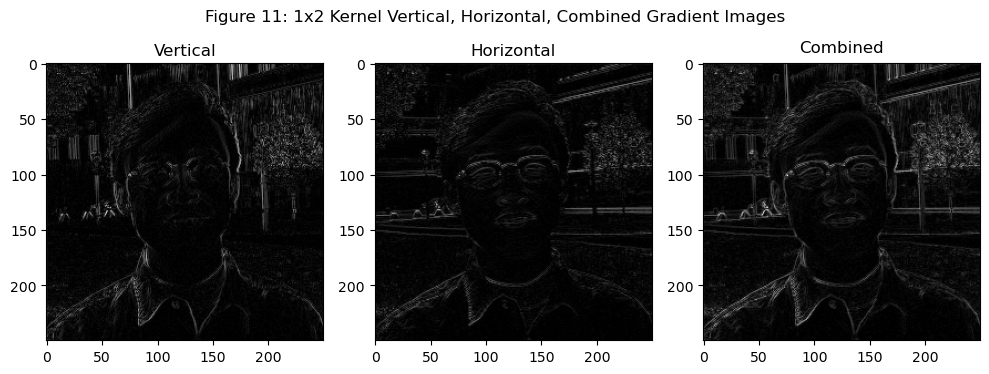

In [26]:
#displaying vertical, horizontal, and combined gradient images from 1x2 kernel 
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,5))
ax1.imshow(v_12_img,cmap='gray')
ax1.set_title('Vertical')
ax2.imshow(h_12_img,cmap='gray')
ax2.set_title('Horizontal')
ax3.imshow(combined_12_img,cmap='gray')
ax3.set_title('Combined',ha='center',va='bottom')
plt.suptitle('Figure 11: 1x2 Kernel Vertical, Horizontal, Combined Gradient Images')
plt.tight_layout(rect=[0, 0.25, 1, 1])
plt.show()

##### Sobel Operator

In [27]:
#define function for applying a 3x3 kernel onto an image
def apply_3x3_kernel(padded_img,shape,kernel,norm_const):
    #define bounds for looping 
    r,c = shape
    #define empty image to populate with results 
    res = np.zeros(shape)
    #perform convolutional operation to produce gradient image 
    for i in range(r):
        for j in range(c):
            #perform convolution
            intensity = padded_img[i-1,j-1]*kernel[0][0]+\
                        padded_img[i-1,j]*kernel[0][1]+\
                        padded_img[i-1,j+1]*kernel[0][2]+\
                        padded_img[i,j-1]*kernel[1][0]+\
                        padded_img[i,j]*kernel[1][1]+\
                        padded_img[i,j+1]*kernel[1][2]+\
                        padded_img[i+1,j-1]*kernel[2][0]+\
                        padded_img[i+1,j]*kernel[2][1]+\
                        padded_img[i+1,j+1]*kernel[2][2]
            res[i,j] = intensity / norm_const
    
    return res 

In [71]:
#define sobel kernels 

##vertical gradient
s1 = [[-1,0,1],[-2,0,2],[-1,0,1]]
##horizontal gradient 
s2 = [[-1,-2,-1],[0,0,0],[1,2,1]]

#vertical gradient 
v_sobel_img = apply_3x3_kernel(img_padded,img.shape,s1,4)

#horizontal gradient 
h_sobel_img = apply_3x3_kernel(img_padded,img.shape,s2,4)

#combined gradient 
combined_sobel_img = np.sqrt(np.power(v_sobel_img,2) + np.power(h_sobel_img,2))

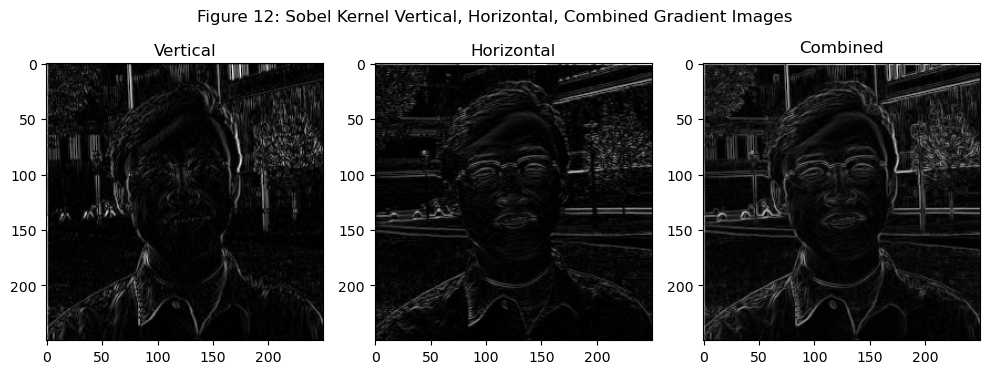

In [72]:
#displaying vertical, horizontal, and combined gradient images from sobel kernel 
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,5))
ax1.imshow(np.abs(v_sobel_img).astype('uint8'),cmap='gray')
ax1.set_title('Vertical')
ax2.imshow(np.abs(h_sobel_img).astype('uint8'),cmap='gray')
ax2.set_title('Horizontal')
ax3.imshow(combined_sobel_img.astype('uint8'),cmap='gray')
ax3.set_title('Combined',ha='center',va='bottom')
plt.suptitle('Figure 12: Sobel Kernel Vertical, Horizontal, Combined Gradient Images')
plt.tight_layout(rect=[0, 0.25, 1, 1])
plt.show()

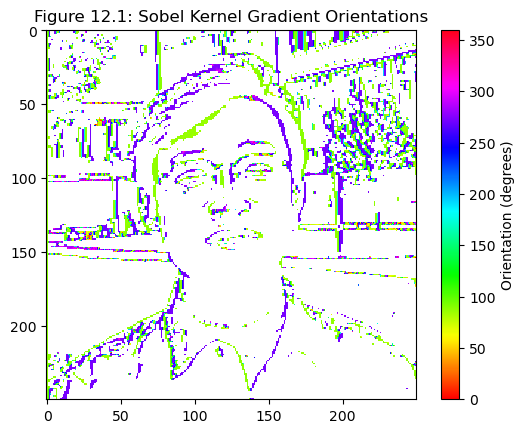

In [98]:
#sobel orientation matrix
#compute the orientations, convert to degrees, and then fix within the range of 0 to 360
combined_sobel_orientations = (np.degrees(np.arctan(v_sobel_img,h_sobel_img))+360)%360
#setting a threshold for non major edges 
combined_sobel_orientations[combined_sobel_img.astype('uint8')<20]=None

#define color map
cmap = plt.get_cmap('hsv',360)

#display
fig,ax = plt.subplots()
plot = ax.imshow(combined_sobel_orientations,cmap=cmap,vmin=0,vmax=360)
colorbar = plt.colorbar(plot,ax=ax)
colorbar.set_label('Orientation (degrees)')
plt.title('Figure 12.1: Sobel Kernel Gradient Orientations');

##### 1x2 vs Sobel Operator

In [30]:
#function for calculating the residual image 
def return_residual_image(img_to_be_scaled,img):
    #perform linear scaling 
    #defining constants 
    Imin = np.min(img_to_be_scaled)
    Imax = np.max(img_to_be_scaled)
    m = 255/(Imax-Imin)
    b = (255/(Imax-Imin))*Imin

    #create empty image of the same shape as the original 
    scaled_img = np.zeros(img_to_be_scaled.shape)

    #calculate linearly scaled image  
    scaled_img = m*img_to_be_scaled + b 
    scaled_img = scaled_img.astype('uint8')

    #compute residual image 
    res = np.abs(img - scaled_img).astype('uint8')
    return res 

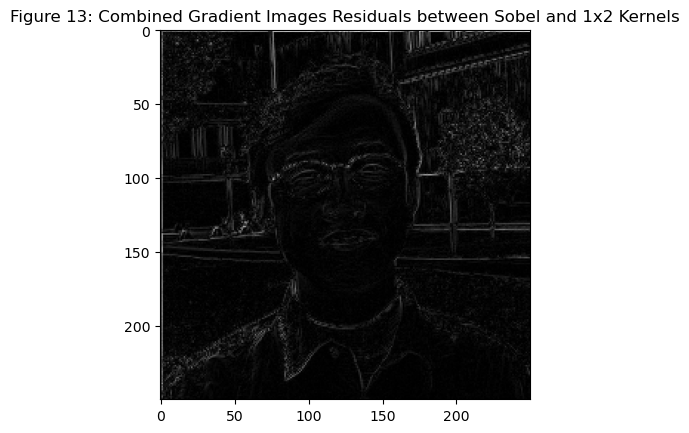

In [31]:
#computing the residuals between the 1x2 combined gradient image and the combined sobel gradient image
diff_12_sobel = return_residual_image(combined_12_img,combined_sobel_img)
#displaying vertical, horizontal, and combined gradient images residuals
plt.imshow(diff_12_sobel,cmap='gray')
plt.title('Figure 13: Combined Gradient Images Residuals between Sobel and 1x2 Kernels')
plt.show()

##### Repeating the above Procedure on an Ideal Image

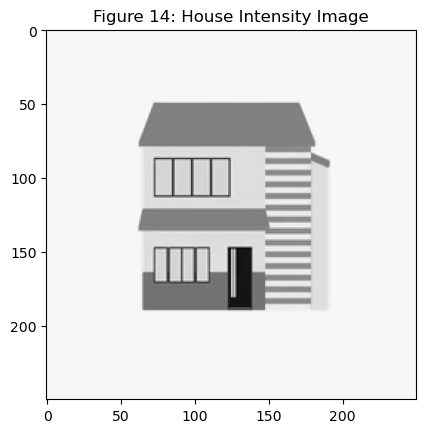

In [32]:
#reading in image as numpy array 
img_color_house = plt.imread('images/house.bmp')[:,:,:3] #only considering R,G,B channels, and ignoring alpha channel 
#converting image into intensity image via simple average approach 
img_house = np.round(np.sum(img_color_house,axis=2)/3).astype('uint8')
#displaying image 
plt.imshow(img_house,cmap='gray');
plt.title('Figure 14: House Intensity Image');

#padding the input image with zeros on the edges for kernel operations 
img_padded_house = np.zeros((img_house.shape[0]+2,img_house.shape[1]+2))
img_padded_house[1:1+img_house.shape[0],1:1+img_house.shape[1]] = img_house

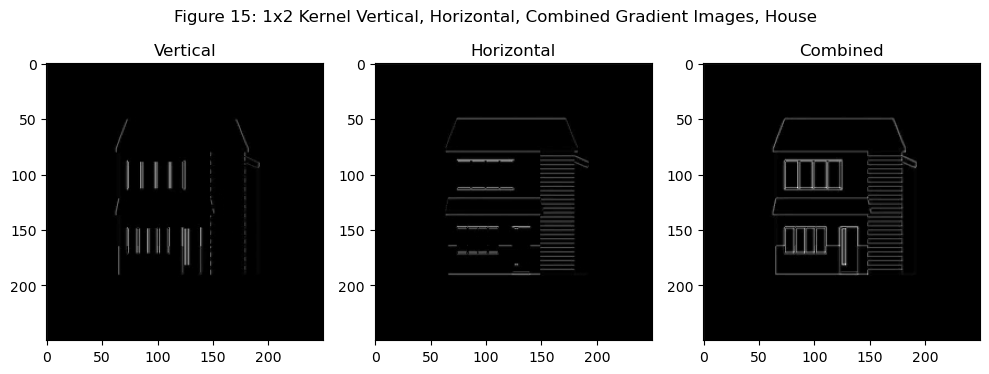

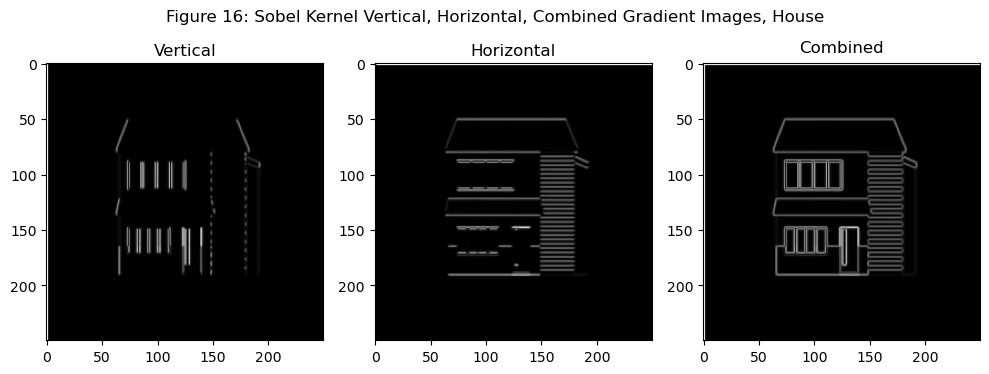

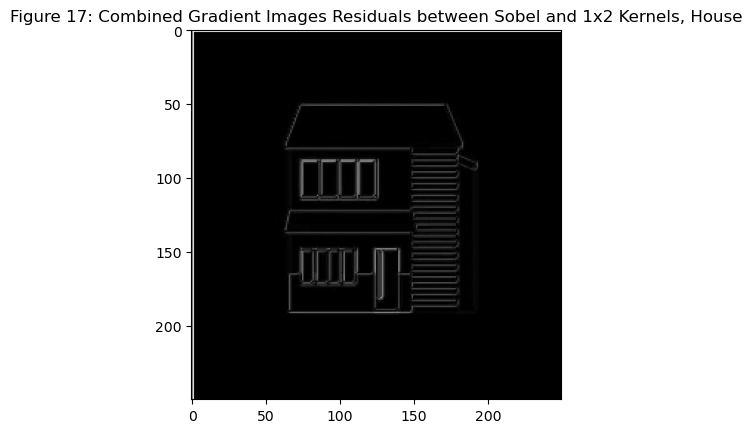

In [33]:
#create empty vertical gradient image 
v_12_img_house = np.zeros(img_house.shape)
#create empty horizontal gradient image 
h_12_img_house = np.zeros(img_house.shape)

#define bounds for looping 
r,c = img_house.shape

#horizontal gradiant image 
##for each pixel, perform convolutional operation for the gradiant image
for i in range(0,r):
    for j in range(0,c):
        #kernel[0]*i(i,j) + kernel[1]*i[i+1,j]
        #normalize by dividing by 2 
        h_12_img_house[i,j] = (kernel_1_2[0]*img_padded_house[i,j]+kernel_1_2[1]*img_padded_house[i+1,j])/2

#vertical gradiant image 
##for each pixel, perform convolutional operation for the gradiant image
for i in range(0,r):
    for j in range(0,c):
        #kernel[0]*i(i,j) + kernel[1]*i[i,j+1]
        #normalize by dividing by 2 
        v_12_img_house[i,j] = (kernel_1_2[0]*img_padded_house[i,j]+kernel_1_2[1]*img_padded_house[i,j+1])/2

#taking abs of the values 
v_12_img_house = np.abs(v_12_img_house).astype('uint8')
h_12_img_house = np.abs(h_12_img_house).astype('uint8')
#creating combined vertical and horizontal images
combined_12_img_house = (v_12_img_house + h_12_img_house)/2 #divide by 2 to normalize
combined_12_img_house = combined_12_img_house.astype('uint8')

#displaying vertical, horizontal, and combined gradient images from 1x2 kernel 
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,5))
ax1.imshow(v_12_img_house,cmap='gray')
ax1.set_title('Vertical')
ax2.imshow(h_12_img_house,cmap='gray')
ax2.set_title('Horizontal')
ax3.imshow(combined_12_img_house,cmap='gray')
ax3.set_title('Combined')
plt.suptitle('Figure 15: 1x2 Kernel Vertical, Horizontal, Combined Gradient Images, House')
plt.tight_layout(rect=[0, 0.25, 1, 1])
plt.show()

#vertical gradient 
v_sobel_img_house = apply_3x3_kernel(img_padded_house,img_house.shape,s1,4)

#horizontal gradient 
h_sobel_img_house = apply_3x3_kernel(img_padded_house,img_house.shape,s2,4)

#combined gradient 
combined_sobel_img_house = np.sqrt(np.power(v_sobel_img_house,2) + np.power(h_sobel_img_house,2))

#displaying vertical, horizontal, and combined gradient images from sobel kernel 
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,5))
ax1.imshow(np.abs(v_sobel_img_house).astype('uint8'),cmap='gray')
ax1.set_title('Vertical')
ax2.imshow(np.abs(h_sobel_img_house).astype('uint8'),cmap='gray')
ax2.set_title('Horizontal')
ax3.imshow(combined_sobel_img_house.astype('uint8'),cmap='gray')
ax3.set_title('Combined',ha='center',va='bottom')
plt.suptitle('Figure 16: Sobel Kernel Vertical, Horizontal, Combined Gradient Images, House')
plt.tight_layout(rect=[0, 0.25, 1, 1])
plt.show()

#computing the residuals between the 1x2 combined gradient image and the combined sobel gradient image
diff_12_sobel = return_residual_image(combined_12_img_house,combined_sobel_img_house)
#displaying vertical, horizontal, and combined gradient images residuals
plt.imshow(diff_12_sobel,cmap='gray')
plt.title('Figure 17: Combined Gradient Images Residuals between Sobel and 1x2 Kernels, House')
plt.show()

#### Question 3

(20 points) Generate edge maps of the above two combined gradient maps (10 points).  An edge image should be a binary image with 1s as edge points and 0s as non-edge points. You may first generate a histogram of each combined gradient map,  and only keep certain percentage of pixels  (e.g.  5% of the pixels with the highest gradient  values) as edge pixels (edgels) . Please study what is the best percentage for a specific image, and why. Use the varying percentage to automatically find a corresponding threshold for the gradient magnitudes, and then pick up the one having the best visual performance. In your report, please write up the description and probably equations for finding the threshold, and discuss what percentage is a good value (5 points). You may also consider to use local, adaptive thresholds to different portions of the image so that all major edges will be shown up nicely (5 points). In the end, please try to generate a sketch of an image, such as the ID image of Prof. Zhu.

##### Histograms of Gradient Maps

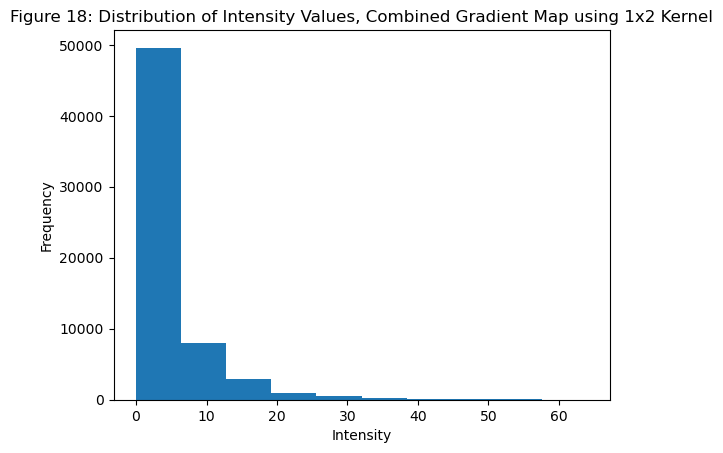

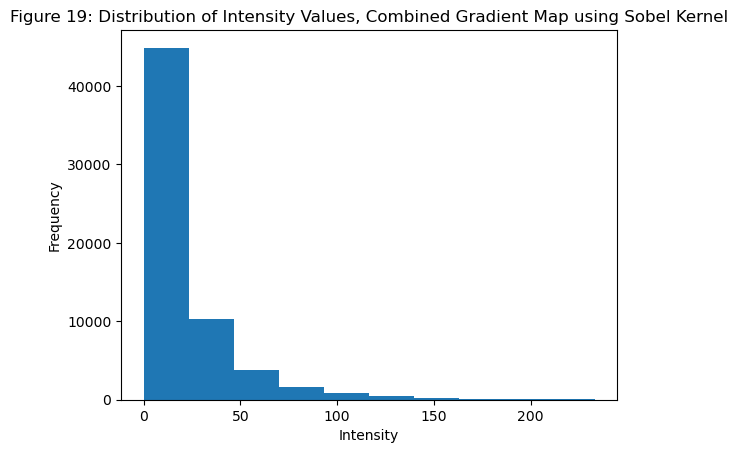

In [34]:
#histogram of both gradient maps 
##1x2 kernel 
plt.hist(combined_12_img.flatten());
plt.title('Figure 18: Distribution of Intensity Values, Combined Gradient Map using 1x2 Kernel')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.show()
##sobel kernel 
plt.hist(combined_sobel_img.flatten());
plt.title('Figure 19: Distribution of Intensity Values, Combined Gradient Map using Sobel Kernel')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.show()


##### Best Threshold of Gradient Magnitude via Percentage of Pixels Kept 

In [35]:
#function to return the pixel intensity threshold given a top X percent of the total number of 
#pixel intensities to keep 
def return_threshold(image,top_x_percent):
    #checking if top_x_percent is out of 100 or decimal
    if top_x_percent>1:
        top_x_percent = top_x_percent/100
    #calculate the histogram of the image 
    count, bins_count = np.histogram(image.flatten(),bins=255)
    #calculate the sum of all the pixels 
    tot = image.shape[0]*image.shape[1]
    #for loop to find the top x percent of pixel
    cur_sum = 0 
    for i in range(len(count)-1,-1,-1):
        cur_sum += count[i]
        if cur_sum/tot>top_x_percent:
            return int(bins_count[i])


In [36]:
#function to create edge maps of gradient edge images of colored channels 
def edge_map_global_thresholding(image,top_x_percent):
    #calculate pixel intensity threshold
    thres = return_threshold(image,top_x_percent)
    #defien empty image for edge map 
    res = np.zeros(image.shape)
    #create edge map based on threshold 
    res[image>=thres] = 255
    res[image<thres] = 0 
    #typing 
    res = res.astype('uint8')
    return res 

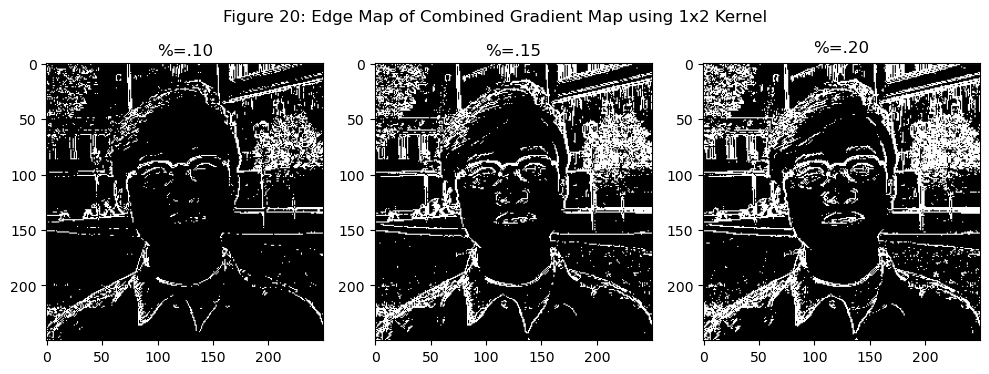

In [37]:
#performing edge maps
edge_map_12_10 = edge_map_global_thresholding(combined_12_img,10)
edge_map_12_15 = edge_map_global_thresholding(combined_12_img,15)
edge_map_12_20 = edge_map_global_thresholding(combined_12_img,20)

#display 
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,5))
ax1.imshow(np.abs(edge_map_12_10),cmap='gray')
ax1.set_title('%=.10')
ax2.imshow(np.abs(edge_map_12_15),cmap='gray')
ax2.set_title('%=.15')
ax3.imshow(edge_map_12_20,cmap='gray')
ax3.set_title('%=.20',ha='center',va='bottom')
plt.suptitle('Figure 20: Edge Map of Combined Gradient Map using 1x2 Kernel')
plt.tight_layout(rect=[0, 0.25, 1, 1])
plt.show()

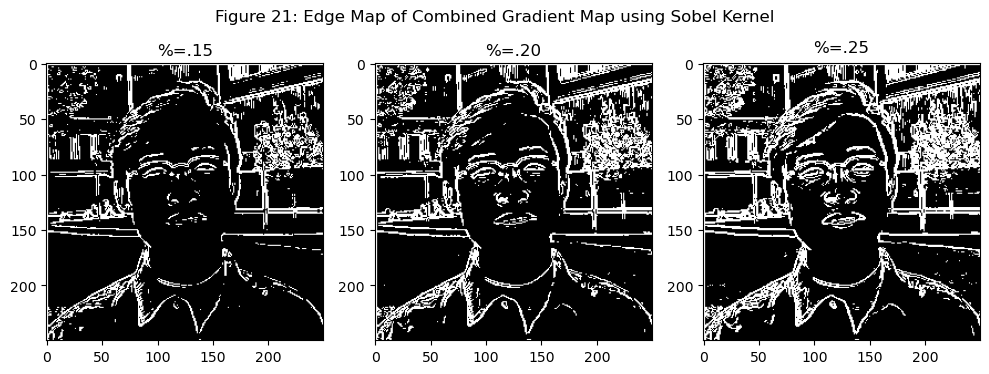

In [38]:
#performing edge maps
edge_map_sobel_15 = edge_map_global_thresholding(combined_sobel_img,15)
edge_map_sobel_20 = edge_map_global_thresholding(combined_sobel_img,20)
edge_map_sobel_25 = edge_map_global_thresholding(combined_sobel_img,25)

#display 
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,5))
ax1.imshow(np.abs(edge_map_sobel_15),cmap='gray')
ax1.set_title('%=.15')
ax2.imshow(np.abs(edge_map_sobel_20),cmap='gray')
ax2.set_title('%=.20')
ax3.imshow(edge_map_sobel_25,cmap='gray')
ax3.set_title('%=.25',ha='center',va='bottom')
plt.suptitle('Figure 21: Edge Map of Combined Gradient Map using Sobel Kernel')
plt.tight_layout(rect=[0, 0.25, 1, 1])
plt.show()

##### Adaptive, Local Thresholding 

In [39]:
def adaptive_edge_map(image,shape,local_img_dim,top_x_percent,cutoff):
    #empty image for edge map
    adaptive_edge_map = np.zeros(shape)
    #define looping bound variables 
    r,c = shape
    #looping for adaptive threshold edge map 
    for i in range(0,r//local_img_dim):
        for j in range(0,c//local_img_dim):
            #define local image based on the defined image dimension 
            local_img = image[i*local_img_dim:i*local_img_dim+local_img_dim,j*local_img_dim:j*local_img_dim+local_img_dim]
            #determine the threshold given a percent input 
            thres = return_threshold(local_img,top_x_percent)
            if thres < cutoff:
                thres=255
            #define empty image for edge map results 
            edge_map_local_img = np.zeros((local_img_dim,local_img_dim))
            #perform edge map operations 
            edge_map_local_img[local_img>=thres] = 255
            edge_map_local_img[local_img<thres] = 0
            #add local edge map to result 
            adaptive_edge_map[i*local_img_dim:i*local_img_dim+local_img_dim,j*local_img_dim:j*local_img_dim+local_img_dim] = edge_map_local_img 
    return adaptive_edge_map

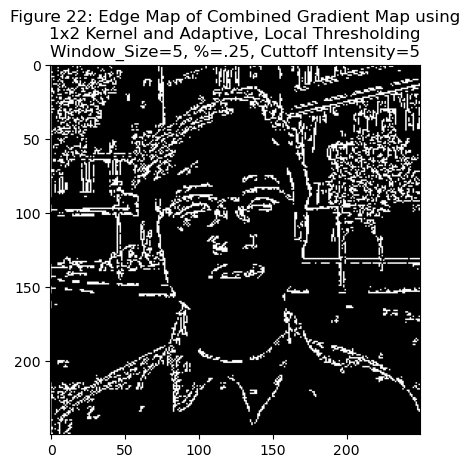

In [40]:
#edge map of combined gradient image using 1x2 kernel with adaptive, local thresholding 
adaptive_edge_map_12 = adaptive_edge_map(combined_12_img,img.shape,5,25,5).astype('uint8')

#display 
plt.imshow(adaptive_edge_map_12,cmap='gray')
plt.title('Figure 22: Edge Map of Combined Gradient Map using\n1x2 Kernel and Adaptive, Local Thresholding\nWindow_Size=5, %=.25, Cuttoff Intensity=5');

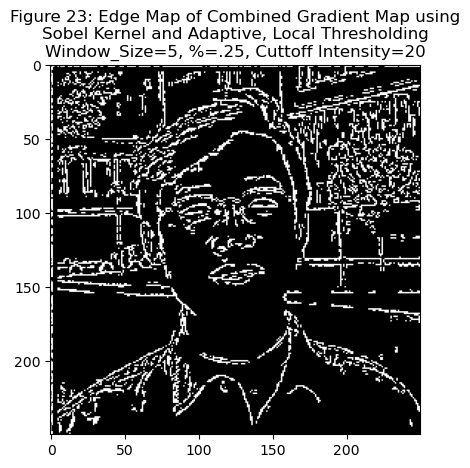

In [41]:
#edge map of combined gradient image using sobel kernel with adaptive, local thresholding 
adaptive_edge_map_sobel = adaptive_edge_map(combined_sobel_img,img.shape,5,25,20).astype('uint8')

#display 
plt.imshow(adaptive_edge_map_sobel,cmap='gray')
plt.title('Figure 23: Edge Map of Combined Gradient Map using\nSobel Kernel and Adaptive, Local Thresholding\nWindow_Size=5, %=.25, Cuttoff Intensity=20');

#### Question 4 

(20 points) What happens when you increase the size of the edge detection kernel from 1×2 to 3×3 and then to 5×5 , or 7×7? Discuss (1) computational cost (in terms of numbers of operations, and the real machine running times – 5 points); (2) edge detection results (5 points) and (3) sensitivity to noise, etc. (5 points). Note that your larger kernel should still be an edge detector. Please list your kernels as matrices in your report, and tell us what they are good for (5 points).

In [42]:
def apply_nxn_kernel(image,kernel):
    #empty image for edge map
    res = np.zeros(image.shape)
    #define looping bound variables 
    r,c = image.shape  
    #created padded image for convolution operation
    border = kernel.shape[0]-1
    img_padded = np.zeros((image.shape[0]+border,image.shape[1]+border))
    img_padded[(border//2):(border//2)+image.shape[0],(border//2):(border//2)+image.shape[1]] = image
    #define kernel dim 
    k_dim = kernel.shape[0]
    #define normalization constant 
    norm_const = np.sum(kernel[kernel>0])
    #looping to apply kernel to image
    for i in range(0,r):
        for j in range(0,c):
            #define local image to apply kernel to 
            local_img = img_padded[i:i+k_dim,j:j+k_dim]
            #perform convolution to find intensity value 
            intensity = np.sum(local_img*kernel)
            #set intensity for pixel 
            res[i,j] = intensity / norm_const

    return res


In [43]:
#increasing size of kernel from 1x2 to 3x3
v_kernel_33 = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
h_kernel_33 = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])

v_kernel_img_33 = apply_nxn_kernel(img,v_kernel_33)
h_kernel_img_33 = apply_nxn_kernel(img,h_kernel_33)
combined_kernel_img_33 = (v_kernel_img_33+h_kernel_img_33)/2
combined_kernel_img_33 = combined_kernel_img_33.astype('uint8')

#increase size of kernel to 5x5 
v_kernel_55 = np.array([[-1,0,0,0,1],[-1,0,0,0,1],[-1,0,0,0,1],[-1,0,0,0,1],[-1,0,0,0,1]])
h_kernel_55 = np.array([[1,1,1,1,1],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[-1,-1,-1,-1,-1]])

v_kernel_img_55 = apply_nxn_kernel(img,v_kernel_55)
h_kernel_img_55 = apply_nxn_kernel(img,h_kernel_55)
combined_kernel_img_55 = (v_kernel_img_55+h_kernel_img_55)/2
combined_kernel_img_55 = combined_kernel_img_55.astype('uint8')

#increase size of kernel to 7x7
v_kernel_77 = np.array([[-1,0,0,0,0,0,1],[-1,0,0,0,0,0,1],[-1,0,0,0,0,0,1],[-1,0,0,0,0,0,1],[-1,0,0,0,0,0,1],[-1,0,0,0,0,0,1],[-1,0,0,0,0,0,1]])
h_kernel_77 = np.array([[1,1,1,1,1,1,1],[0,0,0,0,0,0,0],[0,0,0,0,0,0,0],[0,0,0,0,0,0,0],[0,0,0,0,0,0,0],[0,0,0,0,0,0,0],[-1,-1,-1,-1,-1,-1,-1]])

v_kernel_img_77 = apply_nxn_kernel(img,v_kernel_77)
h_kernel_img_77 = apply_nxn_kernel(img,h_kernel_77)
combined_kernel_img_77 = (v_kernel_img_77+h_kernel_img_77)/2
combined_kernel_img_77 = combined_kernel_img_77.astype('uint8')


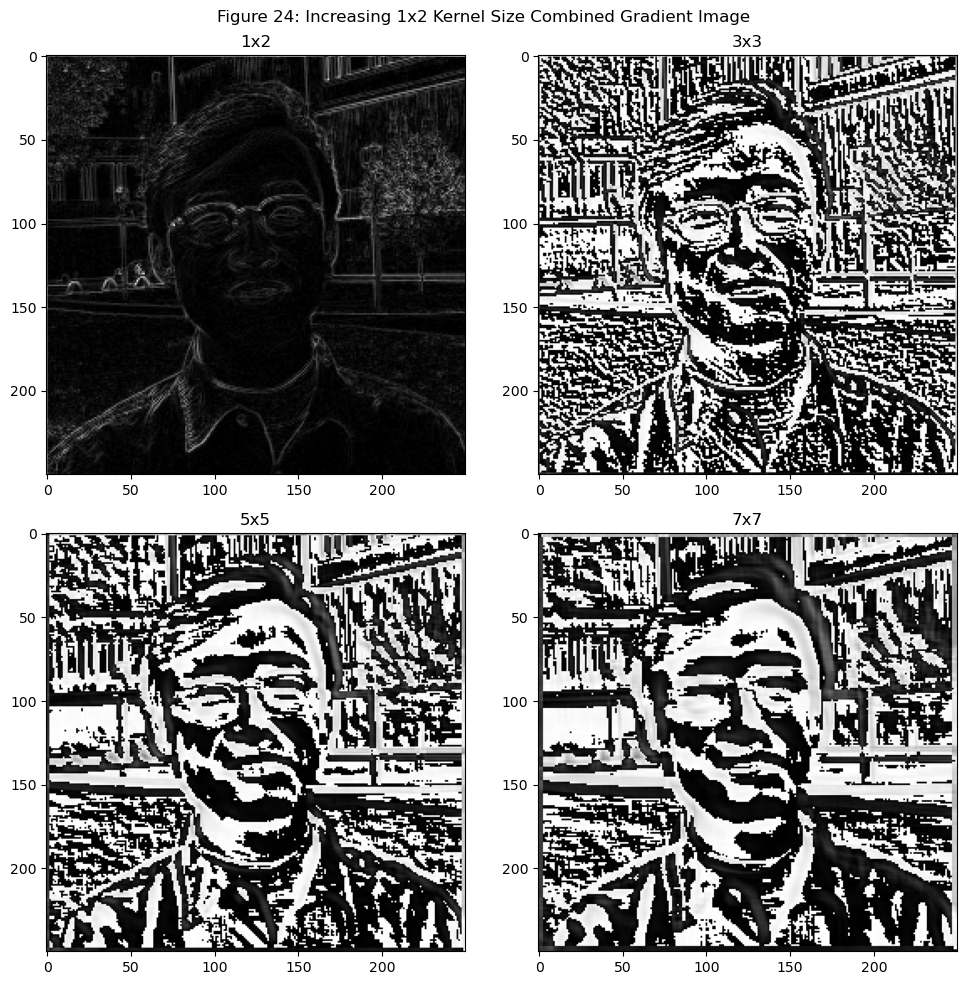

In [44]:
#display
fig,((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(10,10))
ax1.imshow(combined_12_img,cmap='gray')
ax1.set_title('1x2')
ax2.imshow(combined_kernel_img_33,cmap='gray')
ax2.set_title('3x3')
ax3.imshow(combined_kernel_img_55,cmap='gray')
ax3.set_title('5x5')
ax4.imshow(combined_kernel_img_77,cmap='gray')
ax4.set_title('7x7')
plt.suptitle('Figure 24: Increasing 1x2 Kernel Size Combined Gradient Image')
plt.tight_layout()
plt.show()

#### Question 5

(20 points) Suppose you apply the Sobel operator to each of the RGB color bands of a color image.  How might you combine these results into a color edge detector (5 points)?  Do the resulting edge differ from the gray scale results?  How and why (5 points)? You may compare the edge maps of the intensity image (of the color image), the gray-scale edge map that are the combination of the three edge maps from three color bands, or a real color edge map that edge points have colors (5 points). Please discuss their similarities and differences, and how each of them can be used for image enhancement or feature extraction (5 points). Note that you want to first generate gradient maps and then using thresholding to generate edge maps.  In the end, please try to generate a color sketch of an image, such as the ID image of Prof. Zhu. You may also consider local, adaptive thresholding in generating a color edge map.

In [ ]:
#display colored image
plt.imshow(img_color)
plt.title('Figure 25: ID Picture, Colored');

In [46]:
#define function for returning the combined gradient image for sobel 
def combined_sobel_img(img1,img2):
    return np.sqrt(np.power(img1,2) + np.power(img2,2))

In [47]:
#applying sobel operator to each of the RGB color bands 

#splitting color bands 
img_red = img_color[:,:,0] 
img_green = img_color[:,:,1]
img_blue = img_color[:,:,2]

#defining 3x3 sobel kernels 
##vertical gradient
s1 = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
##horizontal gradient 
s2 = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

#applying kernels, vertical gradients
v_red_edges = apply_nxn_kernel(img_red,s1)
v_green_edges = apply_nxn_kernel(img_green,s1)
v_blue_edges = apply_nxn_kernel(img_blue,s1)
#applying kernels, horizontal gradients
h_red_edges = apply_nxn_kernel(img_red,s2)
h_green_edges = apply_nxn_kernel(img_green,s2)
h_blue_edges = apply_nxn_kernel(img_blue,s2)
#combined gradient images for each channel 
combined_red_edges = combined_sobel_img(v_red_edges,h_red_edges)
combined_green_edges = combined_sobel_img(v_green_edges,h_green_edges)
combined_blue_edges = combined_sobel_img(v_blue_edges,h_blue_edges)
#colored edge image
colored_edge_image = np.dstack((combined_red_edges,combined_green_edges,combined_blue_edges)).astype('uint8')


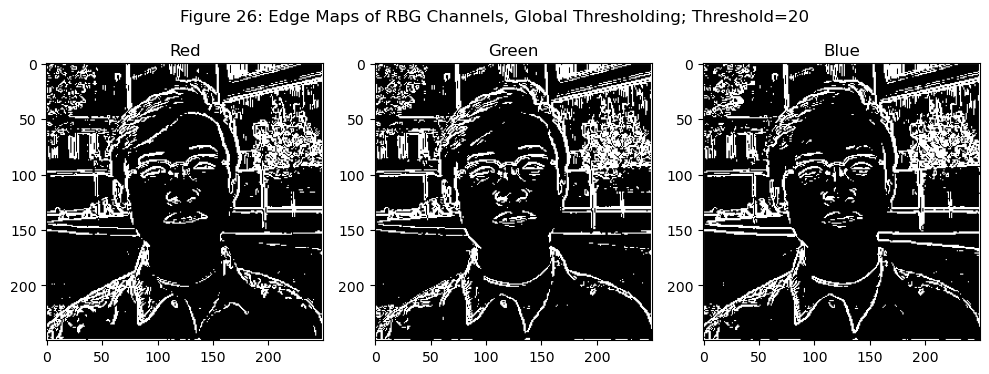

In [48]:
#creating color channel edge maps 
red_edge_map = edge_map_global_thresholding(combined_red_edges,20)
green_edge_map = edge_map_global_thresholding(combined_green_edges,20)
blue_edge_map = edge_map_global_thresholding(combined_blue_edges,20)

#displaying edge maps for 3 channels
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,5))
ax1.imshow(np.abs(red_edge_map).astype('uint8'),cmap='gray')
ax1.set_title('Red')
ax2.imshow(np.abs(green_edge_map).astype('uint8'),cmap='gray')
ax2.set_title('Green')
ax3.imshow(np.abs(blue_edge_map).astype('uint8'),cmap='gray')
ax3.set_title('Blue')
plt.suptitle('Figure 26: Edge Maps of RBG Channels, Global Thresholding; Threshold=20')
plt.tight_layout(rect=[0, 0.25, 1, 1])
plt.show()

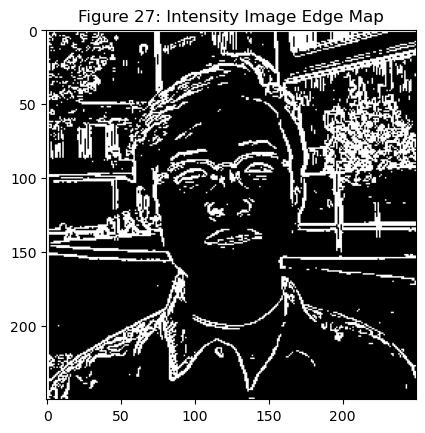

In [49]:
plt.imshow(np.abs(edge_map_sobel_20),cmap='gray')
plt.title('Figure 27: Intensity Image Edge Map');

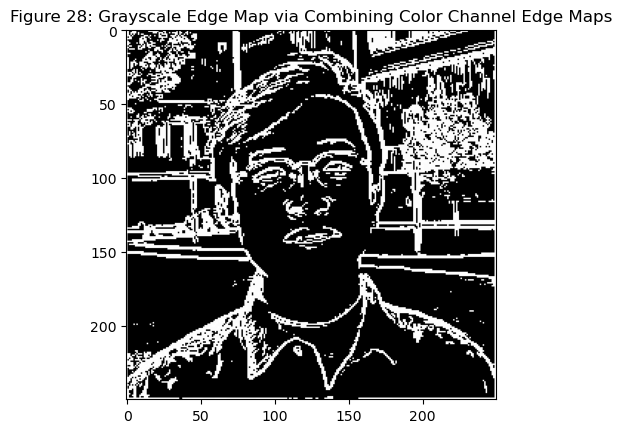

In [50]:
#combine the 3 color band edge maps into a gray-scale edge map
combined_color_band_grayscale = (red_edge_map + green_edge_map + blue_edge_map)/3
combined_color_band_grayscale = combined_color_band_grayscale.astype('uint8')

#display
plt.imshow(combined_color_band_grayscale,cmap='gray')
plt.title('Figure 28: Grayscale Edge Map via Combining Color Channel Edge Maps');

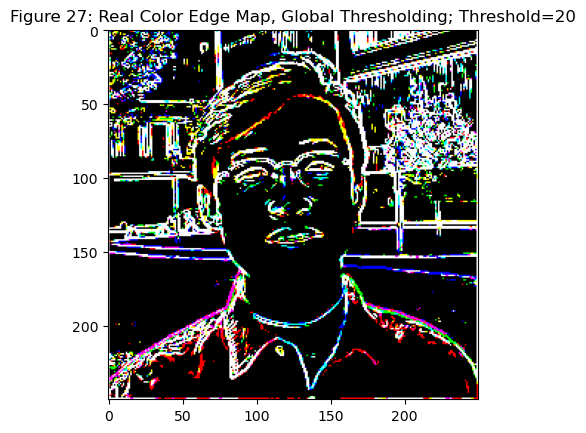

In [51]:
#combine to create colored edge map 
colored_edge_map = np.dstack((red_edge_map,green_edge_map,blue_edge_map)).astype('uint8')
#display 
plt.imshow(colored_edge_map)
plt.title('Figure 27: Real Color Edge Map, Global Thresholding; Threshold=20');

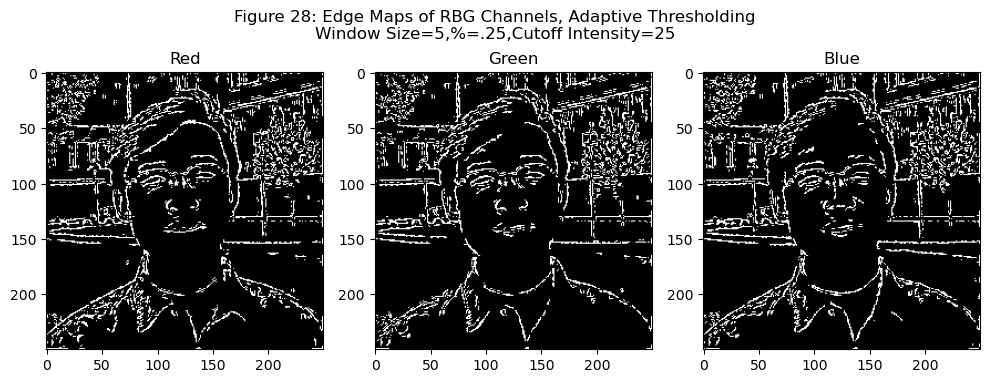

In [52]:
#use adaptive thresholding to create edge maps 
adaptive_edge_map_red = adaptive_edge_map(combined_red_edges,img.shape,5,25,25)
adaptive_edge_map_green = adaptive_edge_map(combined_green_edges,img.shape,5,25,25)
adapative_edge_map_blue = adaptive_edge_map(combined_blue_edges,img.shape,5,25,25)

#displaying edge maps for 3 channels
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,5))
ax1.imshow(np.abs(adaptive_edge_map_red).astype('uint8'),cmap='gray')
ax1.set_title('Red')
ax2.imshow(np.abs(adaptive_edge_map_green).astype('uint8'),cmap='gray')
ax2.set_title('Green')
ax3.imshow(np.abs(adapative_edge_map_blue).astype('uint8'),cmap='gray')
ax3.set_title('Blue')
plt.suptitle('Figure 28: Edge Maps of RBG Channels, Adaptive Thresholding\nWindow Size=5,%=.25,Cutoff Intensity=25')
plt.tight_layout(rect=[0, 0.25, 1, 1])
plt.show()

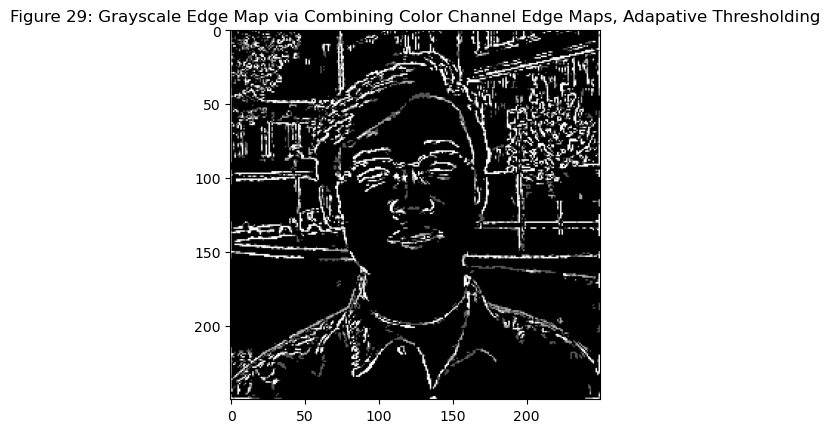

In [53]:
#combine the 3 color band edge maps into a gray-scale edge map
combined_color_band_grayscale_adaptive = (adaptive_edge_map_red + adaptive_edge_map_green + adapative_edge_map_blue)/3
combined_color_band_grayscale_adaptive = combined_color_band_grayscale_adaptive.astype('uint8')

#display
plt.imshow(combined_color_band_grayscale_adaptive,cmap='gray')
plt.title('Figure 29: Grayscale Edge Map via Combining Color Channel Edge Maps, Adapative Thresholding');

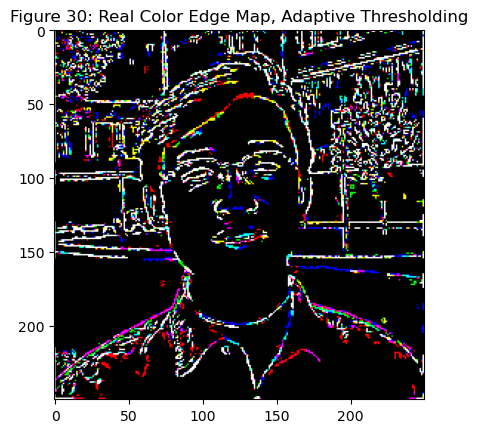

In [54]:
#combine to create colored edge map 
adaptive_colored_edge_map = np.dstack((adaptive_edge_map_red,adaptive_edge_map_green,adapative_edge_map_blue)).astype('uint8')
#display 
plt.imshow(adaptive_colored_edge_map)
plt.title('Figure 30: Real Color Edge Map, Adaptive Thresholding');